In [5]:
# 📦 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ⚙️ Helper function to prepare data
def prepare_data(filepath):
    df = pd.read_csv(filepath)
    df['defects'] = df['defects'].astype(int)
    X = df.drop('defects', axis=1)
    y = df['defects']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    return X_train_smote, X_test, y_train_smote, y_test

# 📂 Load and prepare JM1
X_train_smote_jm1, X_test_jm1, y_train_smote_jm1, y_test_jm1 = prepare_data('../data/JM1.csv')

# 📂 Load and prepare KC1
X_train_smote_kc1, X_test_kc1, y_train_smote_kc1, y_test_kc1 = prepare_data('../data/KC1.csv')

# 🤖 Train models for JM1
logreg_jm1 = LogisticRegression(max_iter=1000)
logreg_jm1.fit(X_train_smote_jm1, y_train_smote_jm1)

rf_model_jm1 = RandomForestClassifier(random_state=42)
rf_model_jm1.fit(X_train_smote_jm1, y_train_smote_jm1)

xgb_model_jm1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_jm1.fit(X_train_smote_jm1, y_train_smote_jm1)

ann_model_jm1 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model_jm1.fit(X_train_smote_jm1, y_train_smote_jm1)

# 🤖 Train models for KC1
logreg_kc1 = LogisticRegression(max_iter=1000)
logreg_kc1.fit(X_train_smote_kc1, y_train_smote_kc1)

rf_model_kc1 = RandomForestClassifier(random_state=42)
rf_model_kc1.fit(X_train_smote_kc1, y_train_smote_kc1)

xgb_model_kc1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_kc1.fit(X_train_smote_kc1, y_train_smote_kc1)

ann_model_kc1 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model_kc1.fit(X_train_smote_kc1, y_train_smote_kc1)

print("✅ All models for JM1 and KC1 retrained successfully!")


C:\Users\josef\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:10:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\josef\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:11:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ All models for JM1 and KC1 retrained successfully!


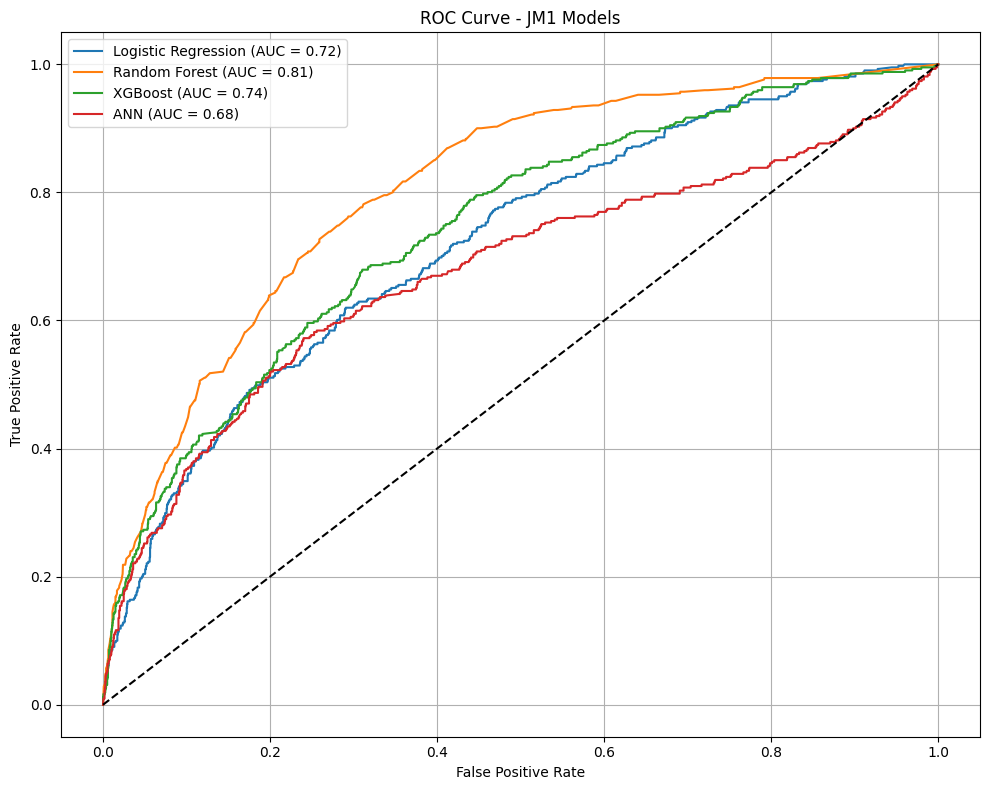

In [6]:
# 📈 ROC and AUC for JM1 models

# Predict probabilities
y_prob_logreg_jm1 = logreg_jm1.predict_proba(X_test_jm1)[:, 1]
y_prob_rf_jm1 = rf_model_jm1.predict_proba(X_test_jm1)[:, 1]
y_prob_xgb_jm1 = xgb_model_jm1.predict_proba(X_test_jm1)[:, 1]
y_prob_ann_jm1 = ann_model_jm1.predict_proba(X_test_jm1)[:, 1]

# Calculate ROC curves
fpr_logreg_jm1, tpr_logreg_jm1, _ = roc_curve(y_test_jm1, y_prob_logreg_jm1)
fpr_rf_jm1, tpr_rf_jm1, _ = roc_curve(y_test_jm1, y_prob_rf_jm1)
fpr_xgb_jm1, tpr_xgb_jm1, _ = roc_curve(y_test_jm1, y_prob_xgb_jm1)
fpr_ann_jm1, tpr_ann_jm1, _ = roc_curve(y_test_jm1, y_prob_ann_jm1)

# AUC scores
auc_logreg_jm1 = roc_auc_score(y_test_jm1, y_prob_logreg_jm1)
auc_rf_jm1 = roc_auc_score(y_test_jm1, y_prob_rf_jm1)
auc_xgb_jm1 = roc_auc_score(y_test_jm1, y_prob_xgb_jm1)
auc_ann_jm1 = roc_auc_score(y_test_jm1, y_prob_ann_jm1)

# Plot
plt.figure(figsize=(10,8))
plt.plot(fpr_logreg_jm1, tpr_logreg_jm1, label=f'Logistic Regression (AUC = {auc_logreg_jm1:.2f})')
plt.plot(fpr_rf_jm1, tpr_rf_jm1, label=f'Random Forest (AUC = {auc_rf_jm1:.2f})')
plt.plot(fpr_xgb_jm1, tpr_xgb_jm1, label=f'XGBoost (AUC = {auc_xgb_jm1:.2f})')
plt.plot(fpr_ann_jm1, tpr_ann_jm1, label=f'ANN (AUC = {auc_ann_jm1:.2f})')
plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - JM1 Models')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


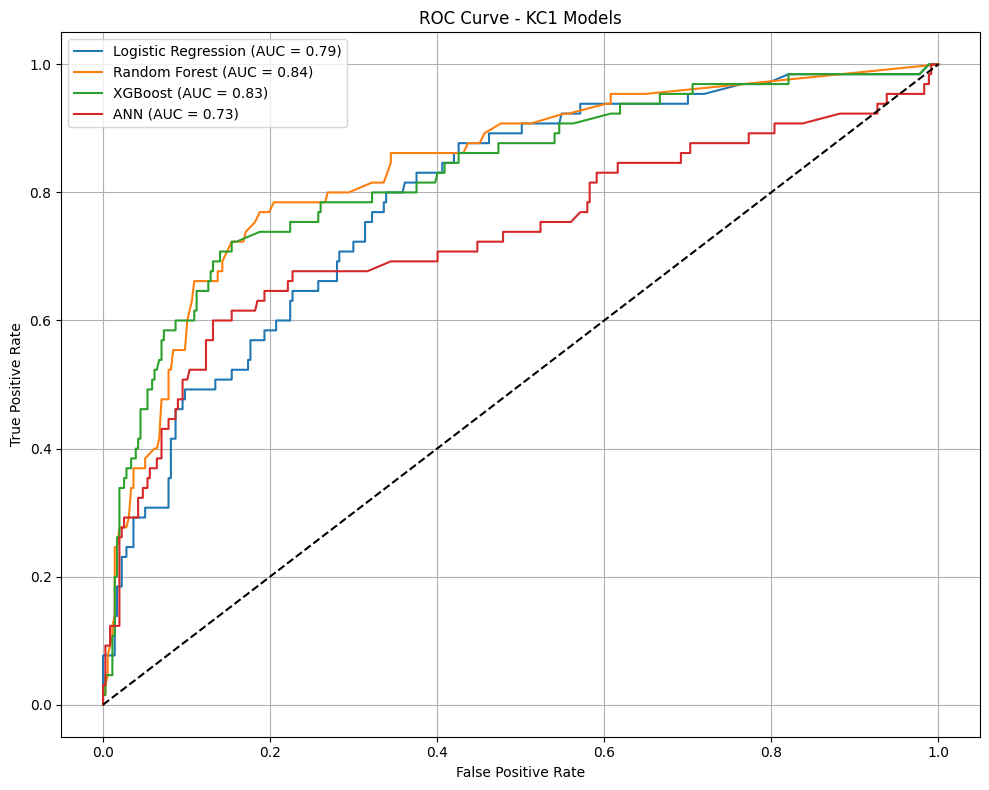

In [7]:
# 📈 ROC and AUC for KC1 models

# Predict probabilities
y_prob_logreg_kc1 = logreg_kc1.predict_proba(X_test_kc1)[:, 1]
y_prob_rf_kc1 = rf_model_kc1.predict_proba(X_test_kc1)[:, 1]
y_prob_xgb_kc1 = xgb_model_kc1.predict_proba(X_test_kc1)[:, 1]
y_prob_ann_kc1 = ann_model_kc1.predict_proba(X_test_kc1)[:, 1]

# Calculate ROC curves
fpr_logreg_kc1, tpr_logreg_kc1, _ = roc_curve(y_test_kc1, y_prob_logreg_kc1)
fpr_rf_kc1, tpr_rf_kc1, _ = roc_curve(y_test_kc1, y_prob_rf_kc1)
fpr_xgb_kc1, tpr_xgb_kc1, _ = roc_curve(y_test_kc1, y_prob_xgb_kc1)
fpr_ann_kc1, tpr_ann_kc1, _ = roc_curve(y_test_kc1, y_prob_ann_kc1)

# AUC scores
auc_logreg_kc1 = roc_auc_score(y_test_kc1, y_prob_logreg_kc1)
auc_rf_kc1 = roc_auc_score(y_test_kc1, y_prob_rf_kc1)
auc_xgb_kc1 = roc_auc_score(y_test_kc1, y_prob_xgb_kc1)
auc_ann_kc1 = roc_auc_score(y_test_kc1, y_prob_ann_kc1)

# Plot
plt.figure(figsize=(10,8))
plt.plot(fpr_logreg_kc1, tpr_logreg_kc1, label=f'Logistic Regression (AUC = {auc_logreg_kc1:.2f})')
plt.plot(fpr_rf_kc1, tpr_rf_kc1, label=f'Random Forest (AUC = {auc_rf_kc1:.2f})')
plt.plot(fpr_xgb_kc1, tpr_xgb_kc1, label=f'XGBoost (AUC = {auc_xgb_kc1:.2f})')
plt.plot(fpr_ann_kc1, tpr_ann_kc1, label=f'ANN (AUC = {auc_ann_kc1:.2f})')
plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KC1 Models')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
